In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/DelayedFlights.csv")  # adjust the path if needed

# Display basic info
print(df.shape)
print(df.columns)
df.head()

(1936758, 30)
Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check for missing values in each column
print("Missing values per column:\n")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Duplicate rows: 0


In [3]:
print("Number of rows:", len(df))
print("Number of rows:", df.shape[0])


Number of rows: 1936758
Number of rows: 1936758


In [7]:
# List the columns you want to remove
columns_to_drop = ['FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut']

# Drop the listed columns
df = df.drop(columns=columns_to_drop)


KeyError: "['FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut'] not found in axis"

In [8]:
# Display basic info
print(df.shape)
print(df.columns)
df.head()

(1936758, 26)
Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,TPA,810,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,BWI,515,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,BWI,515,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,JAX,688,0,N,0,NaN,NaN,NaN,NaN,NaN


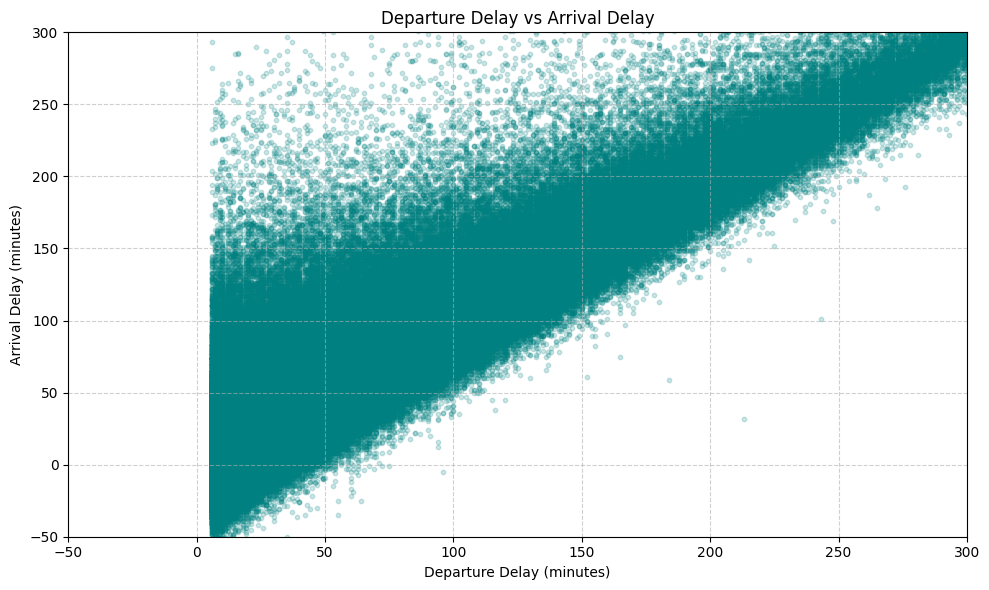

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of departure vs arrival delay
plt.figure(figsize=(10, 6))
plt.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.2, s=10, color='teal')
plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.xlim(-50, 300)
plt.ylim(-50, 300)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


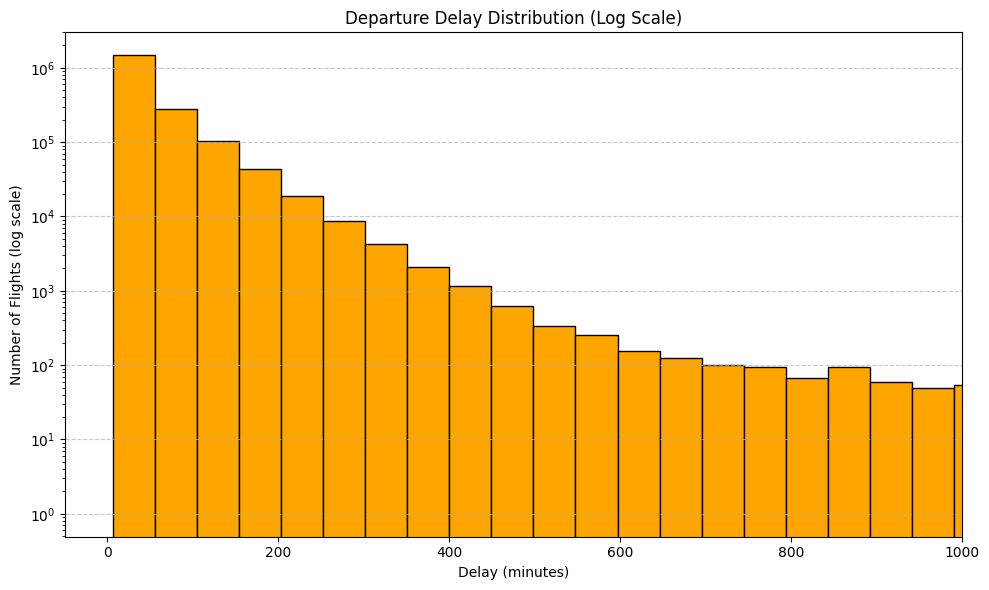

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['DepDelay'].dropna(), bins=50, color='orange', edgecolor='black')
plt.yscale('log')  # Log scale for better visibility
plt.title("Departure Delay Distribution (Log Scale)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights (log scale)")
plt.xlim(-50, 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


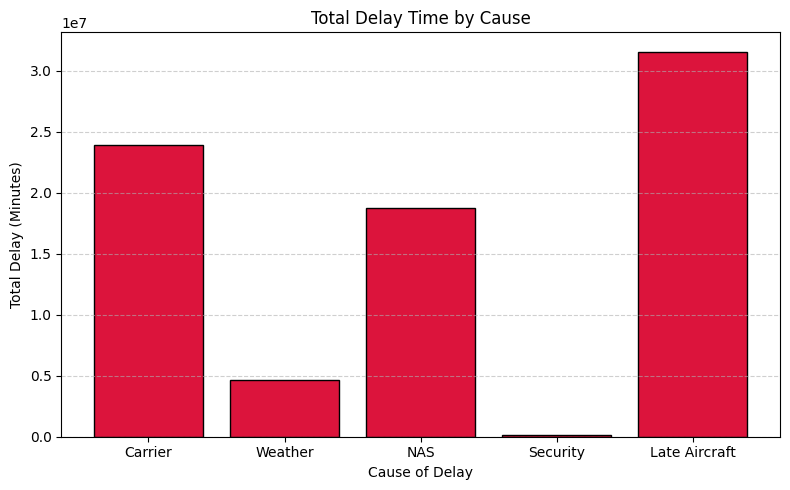

In [23]:
import matplotlib.pyplot as plt

# Calculate total delay time for each cause
delay_causes = {
    'Carrier': df['CarrierDelay'].sum(),
    'Weather': df['WeatherDelay'].sum(),
    'NAS': df['NASDelay'].sum(),
    'Security': df['SecurityDelay'].sum(),
    'Late Aircraft': df['LateAircraftDelay'].sum()
}

# Plot the delay causes
plt.figure(figsize=(8, 5))
plt.bar(delay_causes.keys(), delay_causes.values(), color='crimson', edgecolor='black')
plt.title("Total Delay Time by Cause")
plt.xlabel("Cause of Delay")
plt.ylabel("Total Delay (Minutes)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


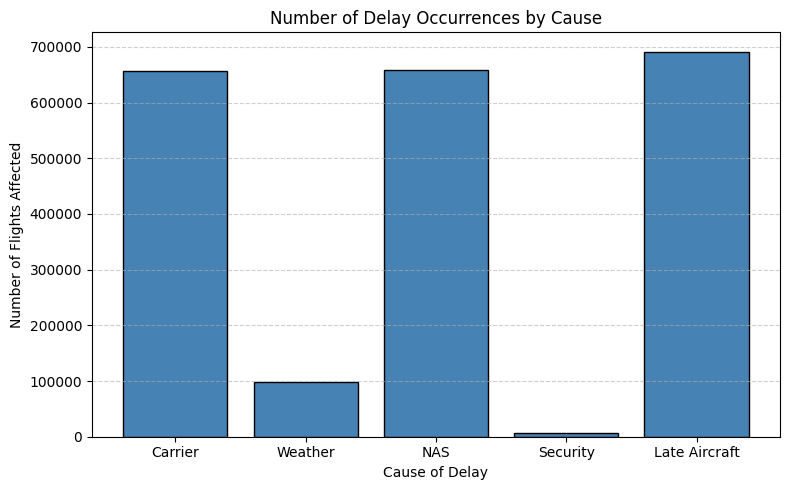

In [24]:
import matplotlib.pyplot as plt

# Count how many times each delay type occurred (non-zero delay)
delay_occurrences = {
    'Carrier': (df['CarrierDelay'] > 0).sum(),
    'Weather': (df['WeatherDelay'] > 0).sum(),
    'NAS': (df['NASDelay'] > 0).sum(),
    'Security': (df['SecurityDelay'] > 0).sum(),
    'Late Aircraft': (df['LateAircraftDelay'] > 0).sum()
}

# Plot the occurrences
plt.figure(figsize=(8, 5))
plt.bar(delay_occurrences.keys(), delay_occurrences.values(), color='steelblue', edgecolor='black')
plt.title("Number of Delay Occurrences by Cause")
plt.xlabel("Cause of Delay")
plt.ylabel("Number of Flights Affected")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [26]:
# Only keep flights where CarrierDelay is not null and greater than 0
carrier_delay_df = df[df['CarrierDelay'] > 0]



In [27]:
# Count how many times each airline had a carrier delay
carrier_counts = carrier_delay_df['UniqueCarrier'].value_counts().sort_values(ascending=False)


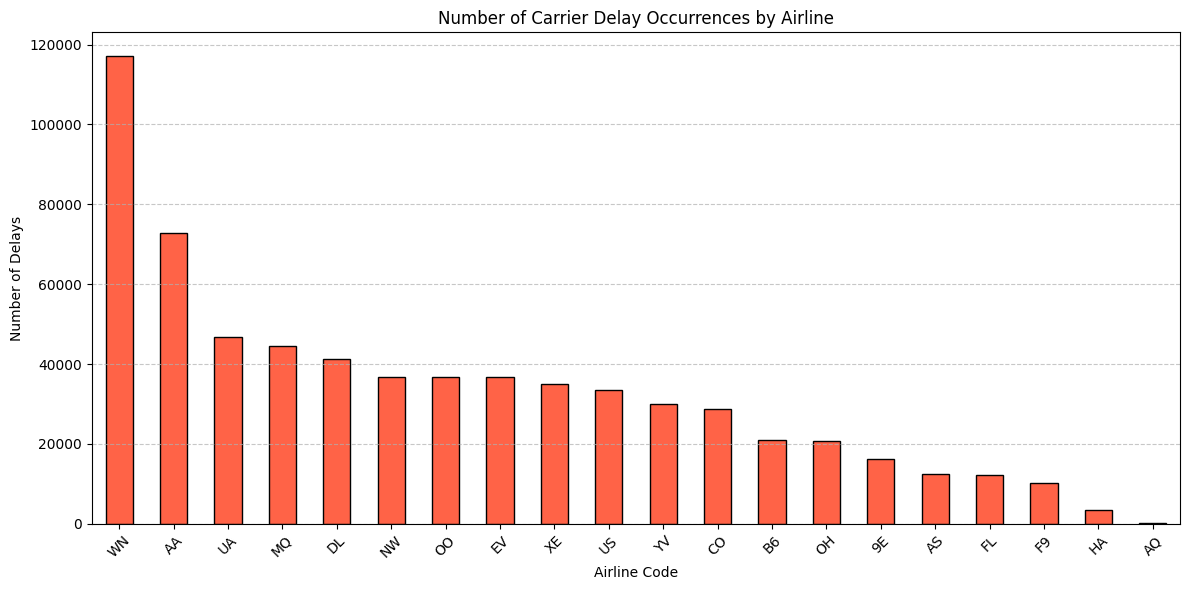

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
carrier_counts.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Number of Carrier Delay Occurrences by Airline")
plt.xlabel("Airline Code")
plt.ylabel("Number of Delays")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


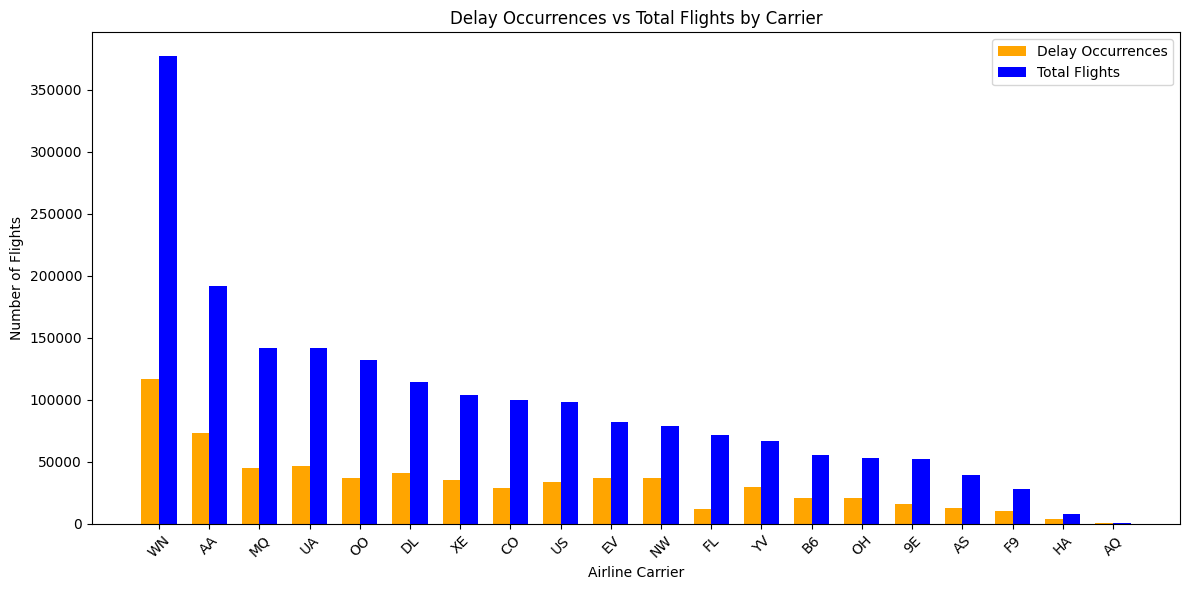

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate delays per carrier
carrier_delay_counts = df[df['CarrierDelay'] > 0]['UniqueCarrier'].value_counts()

# Calculate total flights per carrier
carrier_total_counts = df['UniqueCarrier'].value_counts()

# Align both series by carrier codes
carriers = carrier_total_counts.index
delay_counts = carrier_delay_counts.reindex(carriers, fill_value=0)
total_counts = carrier_total_counts

# Plot side-by-side bars
x = np.arange(len(carriers))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, delay_counts, width, label='Delay Occurrences', color='orange')
bars2 = ax.bar(x + width/2, total_counts, width, label='Total Flights', color='blue')

# Labels and titles
ax.set_xlabel('Airline Carrier')
ax.set_ylabel('Number of Flights')
ax.set_title('Delay Occurrences vs Total Flights by Carrier')
ax.set_xticks(x)
ax.set_xticklabels(carriers)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


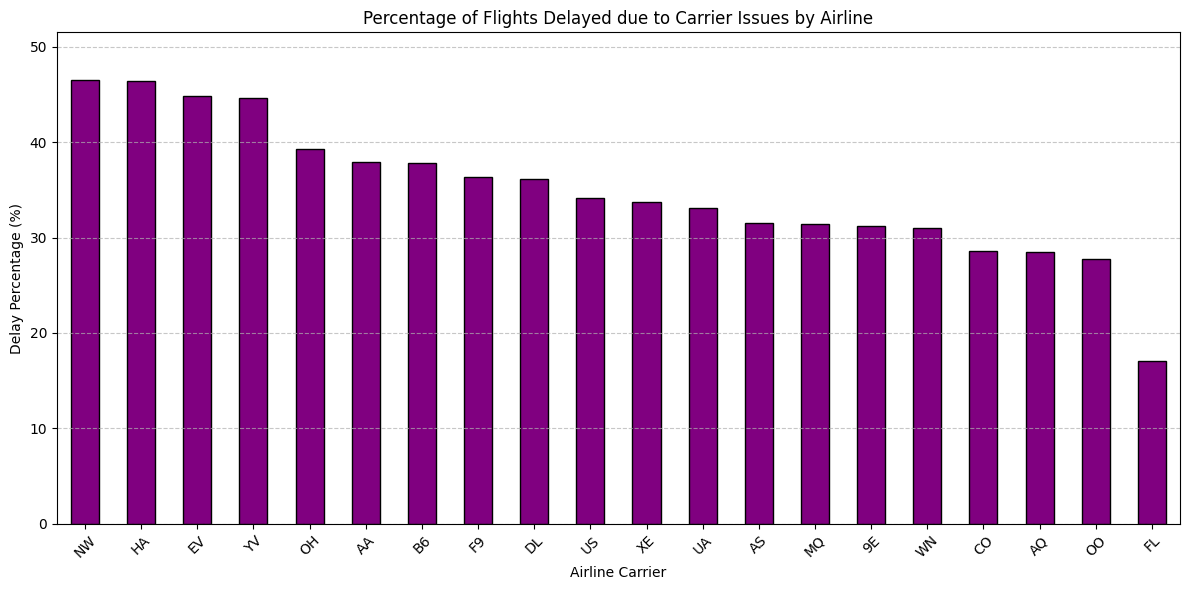

In [30]:
import matplotlib.pyplot as plt

# Calculate delays per carrier
carrier_delay_counts = df[df['CarrierDelay'] > 0]['UniqueCarrier'].value_counts()

# Calculate total flights per carrier
carrier_total_counts = df['UniqueCarrier'].value_counts()

# Calculate percentage of delayed flights per carrier
delay_percentage = (carrier_delay_counts / carrier_total_counts * 100).fillna(0)

# Sort by percentage for better visualization
delay_percentage = delay_percentage.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
delay_percentage.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Percentage of Flights Delayed due to Carrier Issues by Airline')
plt.xlabel('Airline Carrier')
plt.ylabel('Delay Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, delay_percentage.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
# Convert DepTime to hour
def extract_hour(dep_time):
    try:
        dep_time = int(dep_time)
        return dep_time // 100  # integer division to get hour part
    except:
        return None

df['DepHour'] = df['DepTime'].apply(extract_hour)


In [32]:
hourly_delays = df.groupby('DepHour')['DepDelay'].mean().reset_index()

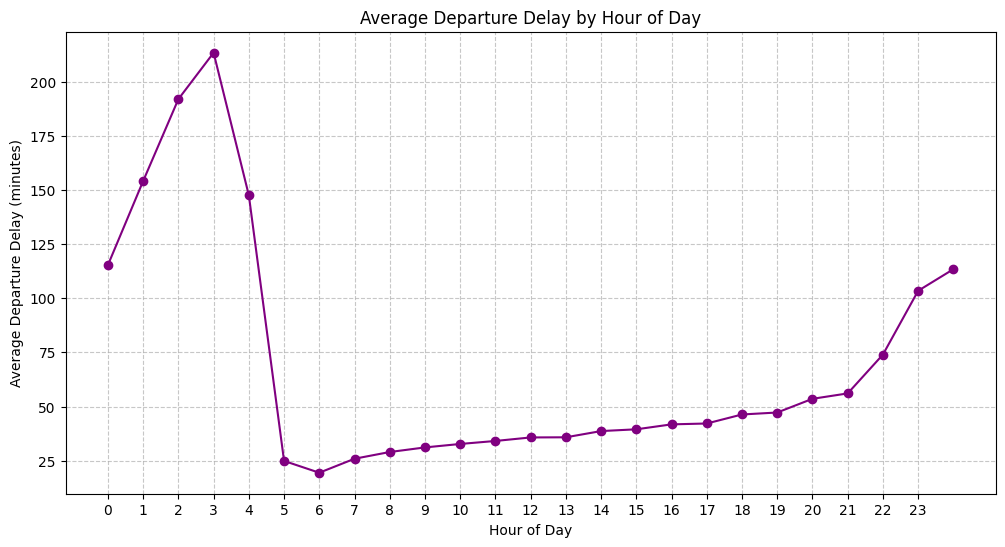

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(hourly_delays['DepHour'], hourly_delays['DepDelay'], marker='o', linestyle='-', color='purple')
plt.title("Average Departure Delay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


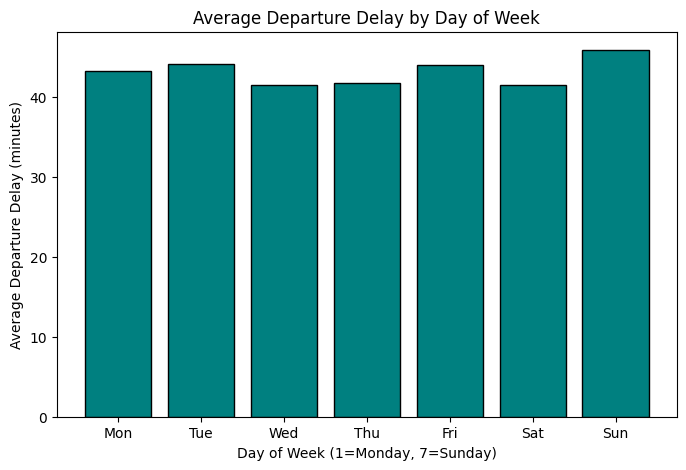

In [34]:
day_delays = df.groupby('DayOfWeek')['DepDelay'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(day_delays['DayOfWeek'], day_delays['DepDelay'], color='teal', edgecolor='black')
plt.title("Average Departure Delay by Day of Week")
plt.xlabel("Day of Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(day_delays['DayOfWeek'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


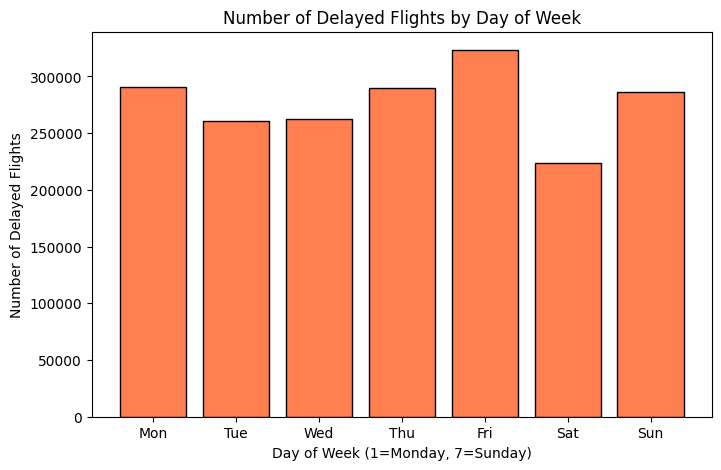

In [35]:
# Filter only flights that were delayed (DepDelay > 0)
delayed_flights = df[df['DepDelay'] > 0]

# Count number of delayed flights by day of the week
delay_counts_by_day = delayed_flights['DayOfWeek'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(delay_counts_by_day.index, delay_counts_by_day.values, color='coral', edgecolor='black')
plt.title("Number of Delayed Flights by Day of Week")
plt.xlabel("Day of Week (1=Monday, 7=Sunday)")
plt.ylabel("Number of Delayed Flights")
plt.xticks(delay_counts_by_day.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


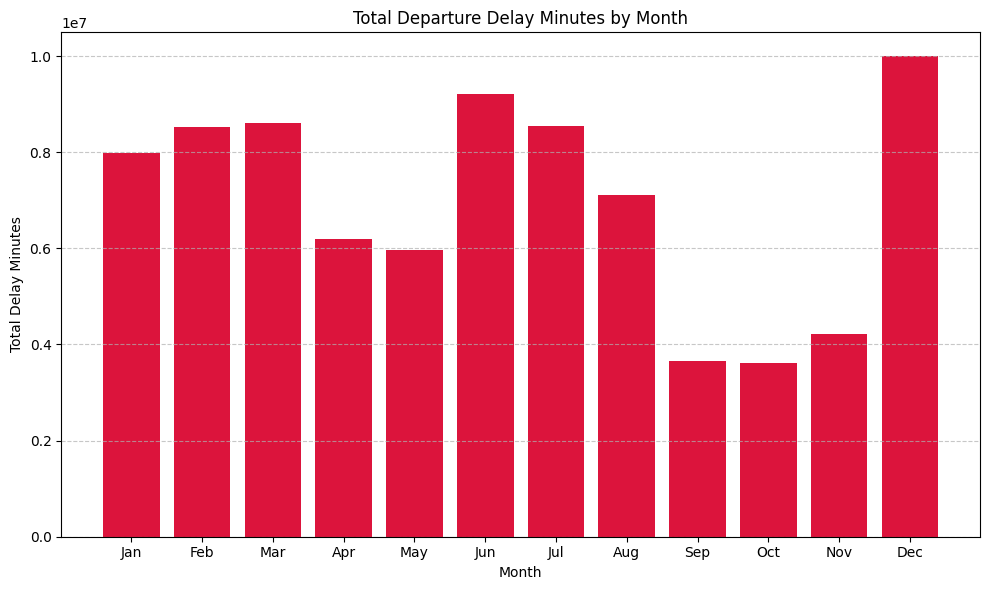

In [37]:
# Total delay minutes by month
monthly_delay_minutes = df[df['DepDelay'] > 0].groupby('Month')['DepDelay'].sum()

# Plot total delay minutes
plt.figure(figsize=(10,6))
plt.bar(monthly_delay_minutes.index, monthly_delay_minutes.values, color='crimson')
plt.xlabel("Month")
plt.ylabel("Total Delay Minutes")
plt.title("Total Departure Delay Minutes by Month")
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


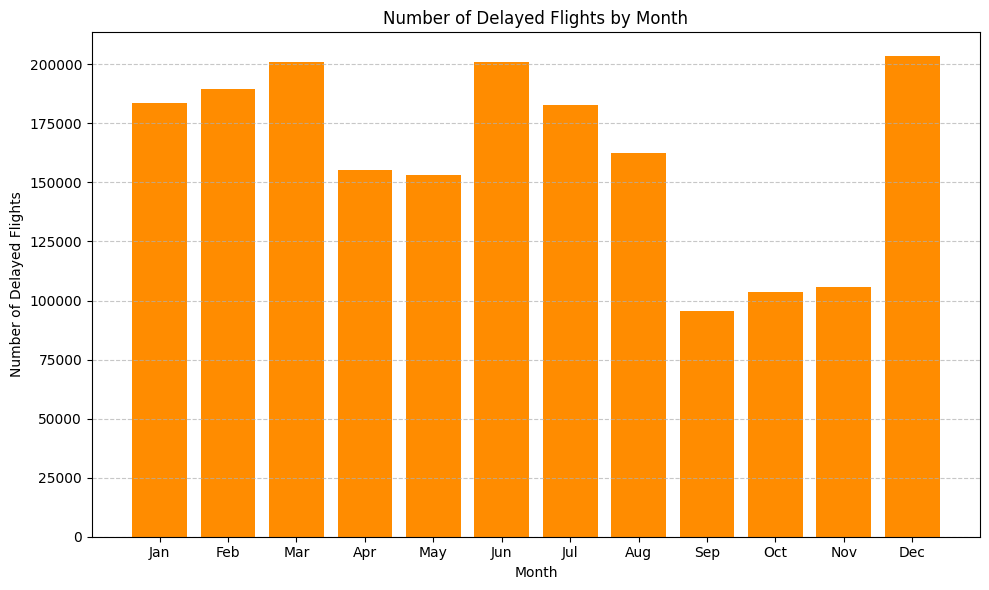

In [38]:
# Count of delayed flights by month
monthly_delay_counts = df[df['DepDelay'] > 0]['Month'].value_counts().sort_index()

# Plot number of delayed flights
plt.figure(figsize=(10,6))
plt.bar(monthly_delay_counts.index, monthly_delay_counts.values, color='darkorange')
plt.xlabel("Month")
plt.ylabel("Number of Delayed Flights")
plt.title("Number of Delayed Flights by Month")
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


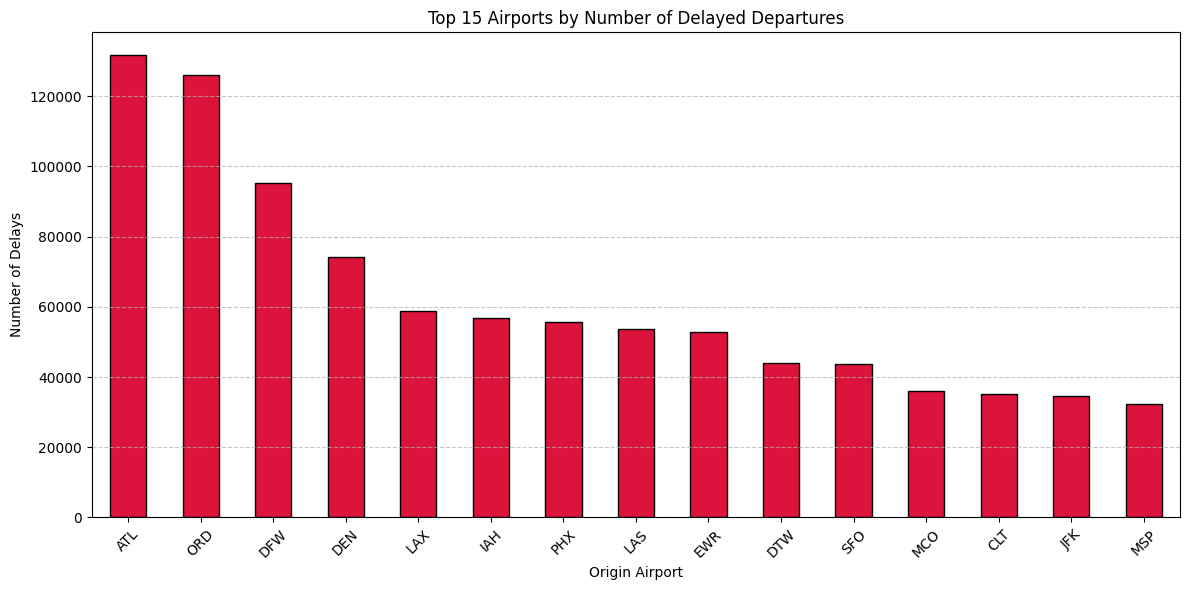

In [39]:
# Count how many times each airport had a delayed departure
delays_by_airport = df[df['DepDelay'] > 0]['Origin'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
delays_by_airport.plot(kind='bar', color='crimson', edgecolor='black')
plt.title("Top 15 Airports by Number of Delayed Departures")
plt.xlabel("Origin Airport")
plt.ylabel("Number of Delays")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


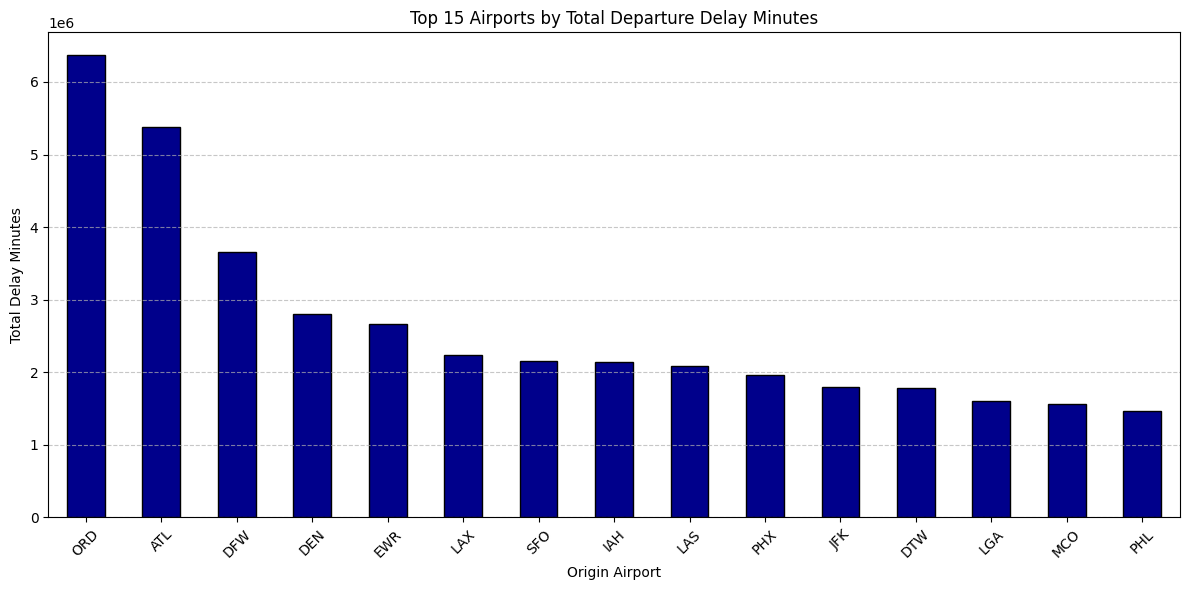

In [40]:
# Sum total departure delay minutes per airport
delay_minutes_by_airport = df[df['DepDelay'] > 0].groupby('Origin')['DepDelay'].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
delay_minutes_by_airport.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title("Top 15 Airports by Total Departure Delay Minutes")
plt.xlabel("Origin Airport")
plt.ylabel("Total Delay Minutes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
delayed_flights = df[df['ArrDelay'] > 0]

In [42]:
delays_by_dest = delayed_flights['Dest'].value_counts().head(15)

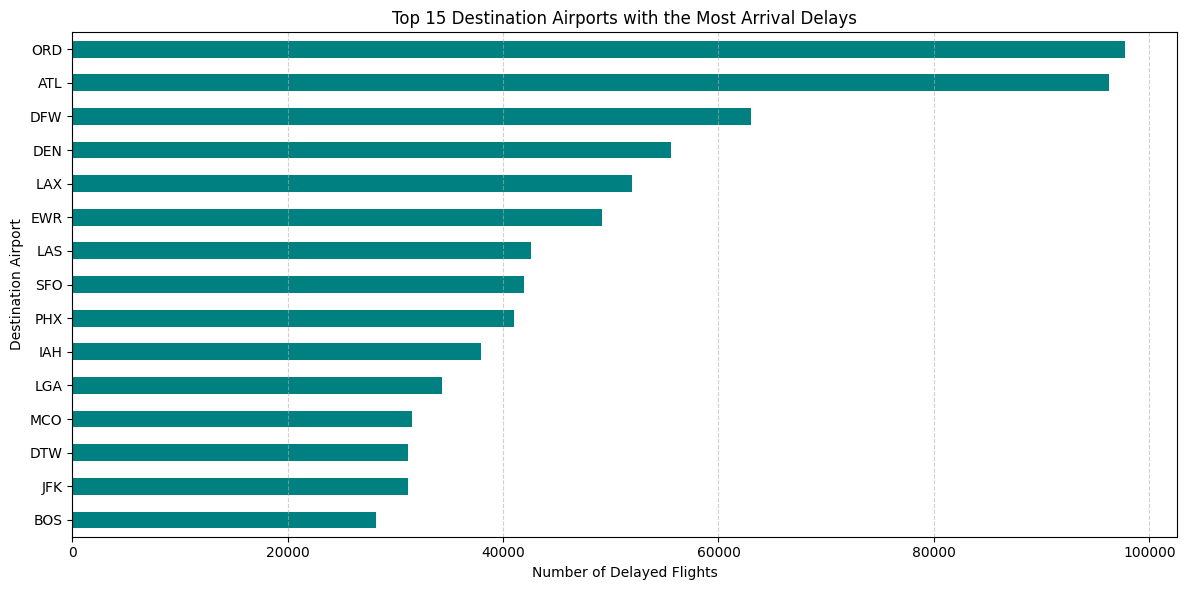

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
delays_by_dest.sort_values().plot(kind='barh', color='teal')
plt.title("Top 15 Destination Airports with the Most Arrival Delays")
plt.xlabel("Number of Delayed Flights")
plt.ylabel("Destination Airport")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


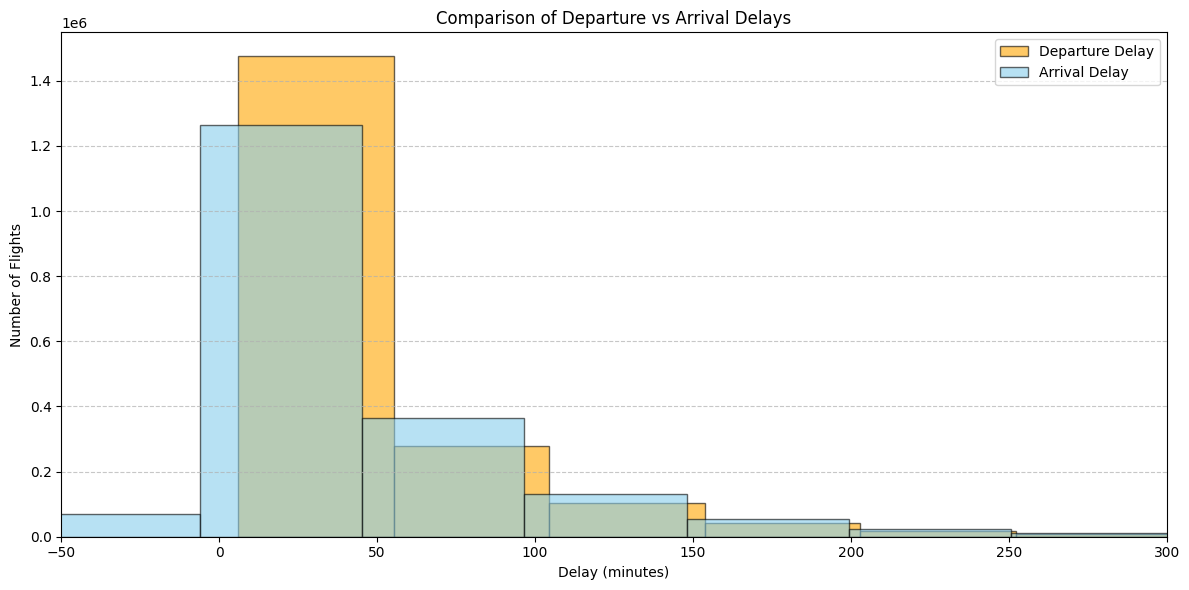

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(df['DepDelay'].dropna(), bins=50, color='orange', alpha=0.6, label='Departure Delay', edgecolor='black')
plt.hist(df['ArrDelay'].dropna(), bins=50, color='skyblue', alpha=0.6, label='Arrival Delay', edgecolor='black')
plt.title("Comparison of Departure vs Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Flights")
plt.xlim(-50, 300)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
# Only keep rows where both DepDelay and ArrDelay exist
delay_recovery_df = df[df['DepDelay'].notnull() & df['ArrDelay'].notnull()]

# Flights that made up time: Arrival delay is less than departure delay
recovered_flights = delay_recovery_df[delay_recovery_df['ArrDelay'] < delay_recovery_df['DepDelay']]

# Calculate recovery percentage
recovery_percent = (len(recovered_flights) / len(delay_recovery_df)) * 100

print(f"🛫🛬 {recovery_percent:.2f}% of flights recovered some delay time en route.")


🛫🛬 60.87% of flights recovered some delay time en route.


In [55]:
# Define average cost per minute of delay (in USD)
cost_per_minute = 80

# Filter flights with delays (departure delay > 0)
delayed_flights = df[df['DepDelay'] > 0]

# Calculate total delay minutes by airline
delay_minutes_by_airline = delayed_flights.groupby('UniqueCarrier')['DepDelay'].sum()

# Calculate estimated cost impact per airline
cost_impact_by_airline = delay_minutes_by_airline * cost_per_minute

# Sort descending and display
cost_impact_by_airline = cost_impact_by_airline.sort_values(ascending=False)
print(cost_impact_by_airline)


UniqueCarrier
WN    1.048785e+09
AA    7.134608e+08
UA    5.655423e+08
MQ    4.964498e+08
OO    4.745439e+08
XE    4.154684e+08
DL    3.569646e+08
CO    3.457824e+08
EV    3.164282e+08
US    3.055599e+08
YV    2.973877e+08
NW    2.614114e+08
B6    2.435213e+08
FL    2.425666e+08
OH    2.061514e+08
9E    1.966248e+08
AS    1.203951e+08
F9    6.264688e+07
HA    1.984816e+07
AQ    1.600800e+06
Name: DepDelay, dtype: float64


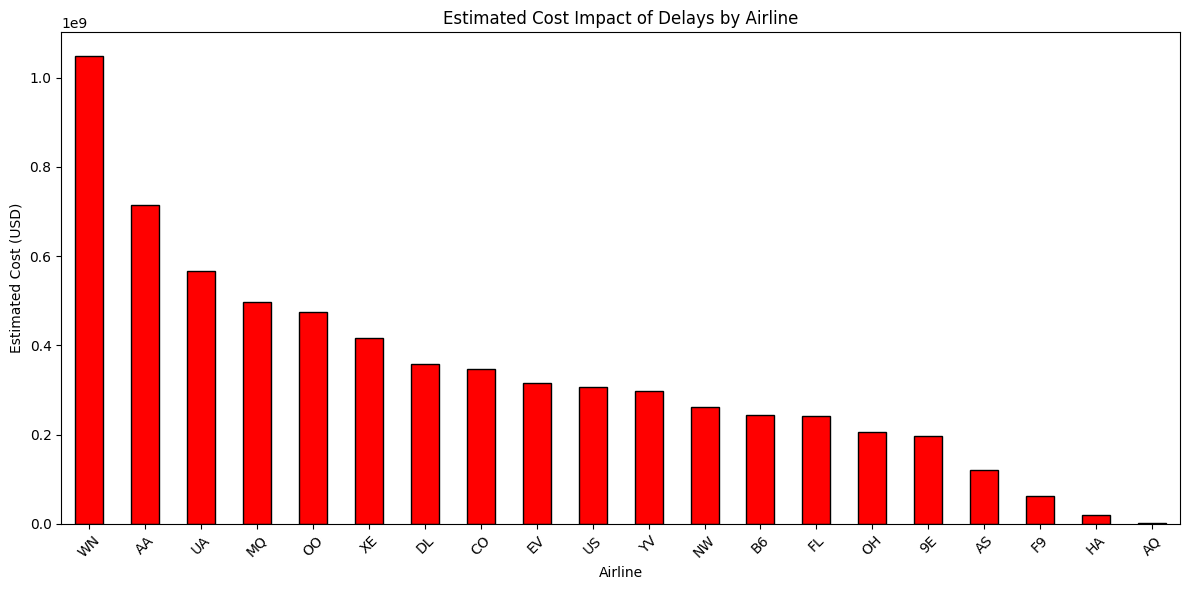

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
cost_impact_by_airline.plot(kind='bar', color='red', edgecolor='black')
plt.title("Estimated Cost Impact of Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Estimated Cost (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
# Filter cancelled flights
cancelled_flights = df[df['Cancelled'] == 1]

# Total cancellations by airline
cancellations_by_airline = cancelled_flights['UniqueCarrier'].value_counts()

# Cancellations by cancellation reason (code)
cancellations_by_reason = cancelled_flights['CancellationCode'].value_counts()

print("Cancellations by Airline:\n", cancellations_by_airline)
print("\nCancellations by Reason:\n", cancellations_by_reason)


Cancellations by Airline:
 UniqueCarrier
MQ    104
OO     89
9E     58
YV     53
UA     47
AA     46
XE     46
CO     38
EV     29
US     26
DL     21
NW     16
WN     15
OH     12
AS     11
B6     10
FL      7
HA      3
F9      2
Name: count, dtype: int64

Cancellations by Reason:
 CancellationCode
B    307
A    246
C     80
Name: count, dtype: int64


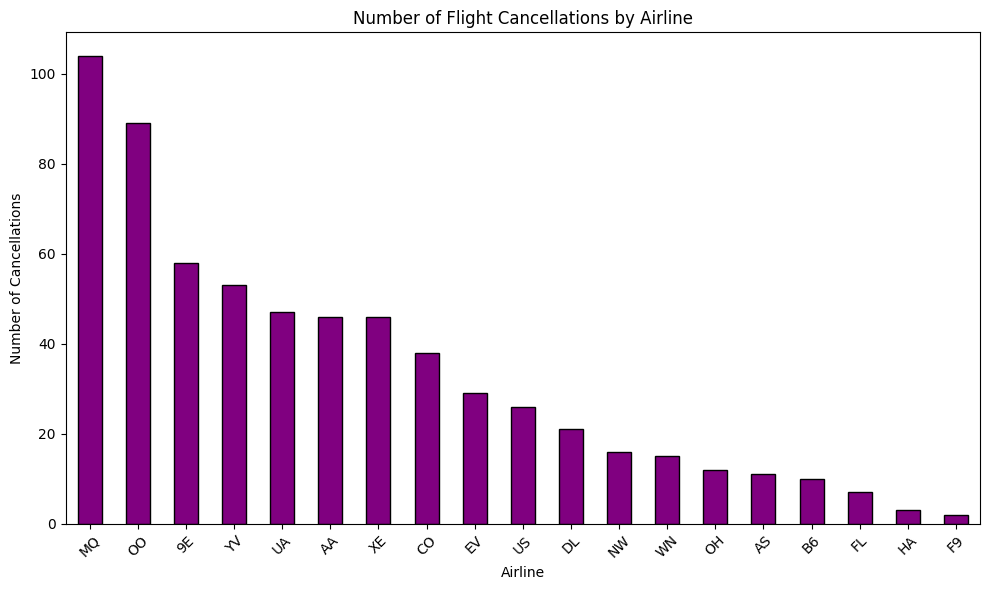

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cancellations_by_airline.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Number of Flight Cancellations by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


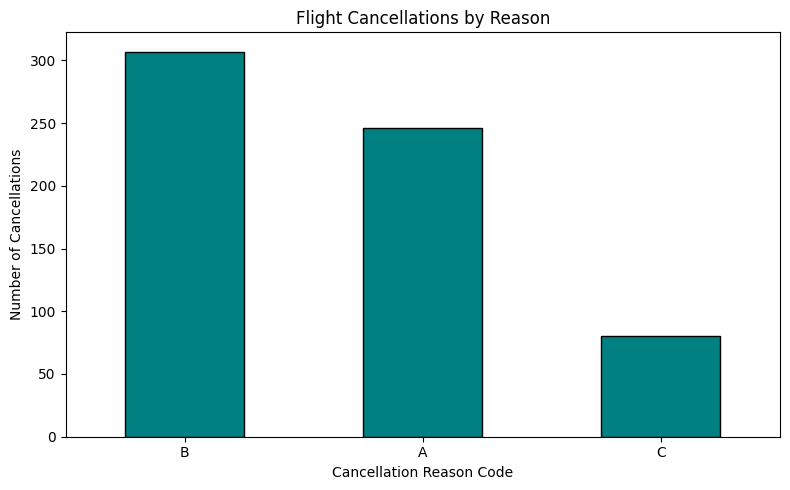

In [59]:
plt.figure(figsize=(8, 5))
cancellations_by_reason.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Flight Cancellations by Reason")
plt.xlabel("Cancellation Reason Code")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
